In [1]:
%pylab inline
from scipy import stats
from lmfit import Model
import seaborn as sns
sns.set_style('ticks')
sns.set_context('notebook', font_scale=1)

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [23]:
def lrt(model_fit0, model_fit1):
    n0 = model_fit0.ndata
    k0 = model_fit0.nvarys
    chisqr0 = model_fit0.chisqr
    assert chisqr0 > 0
    print "chisqr0",chisqr0
    n1 = model_fit1.ndata
    k1 = model_fit1.nvarys
    chisqr1 = model_fit1.chisqr
    print "chisqr1",chisqr1
    assert chisqr1 > 0
    
    lam = chisqr1 / chisqr0 # chisqr ~ 1/lik
    assert 0 <= lam <= 1
    D = -2 * np.log(lam)
    ddf = k1 - k0
    print "D",D,"ddf",ddf
    return stats.chi2.sf(D, ddf)

real: 0.1 1
H1: {'a': 0.088015000848325683, 'b': 0.99954571083584232}
H0: {'a': 1, 'b': 1.3241635904809967}
chisqr0 3.53489871458
chisqr1 1.06263100854
D 2.4038734608 ddf 1
pval 0.121035227271


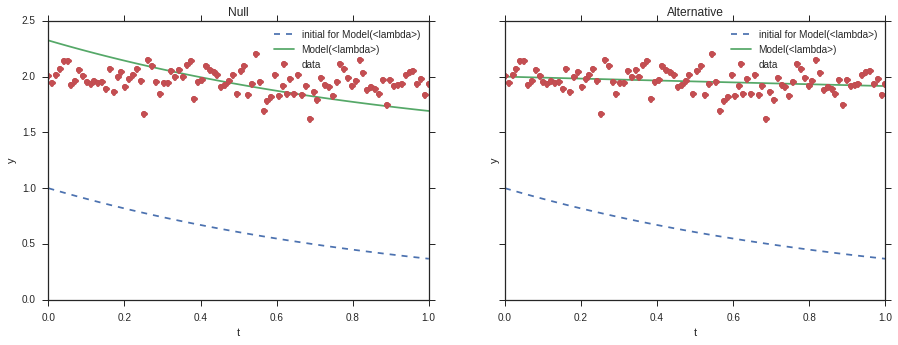

In [47]:
# test lrt
fig, ax = subplots(1,2,sharex=True,sharey=True,figsize=(15,5))

N = 100
t = linspace(0,1,N)
a,b = 0.1,1
f = lambda t,a,b: b + exp(-a*t)
print "real:", a,b
data = f(t,a,b) + normal(0,0.1,N)
model = Model(f)
params = model.make_params(a=1,b=0)

model_fit1 = model.fit(data, t=t, params=params)
model_fit1.plot_fit(ax=ax[1])
ax[1].set_title("Alternative")
#model_fit1.plot_residuals(ax[1])
print "H1:",model_fit1.best_values

params['a'].set(vary=False)
model_fit0 = model.fit(data, t=t, params=params)
model_fit0.plot_fit(ax=ax[0])
#model_fit0.plot_residuals(ax[0])
ax[0].set_title("Null")
print "H0:",model_fit0.best_values

pval = lrt(model_fit0, model_fit1)
print "pval", pval

In [14]:
slope,intercept,r_val,p_val,stderr_val = stats.linregress(t,data)
print p_val, intercept, slope
print ((data - (0.977 + 1 * t))**2).sum()
print ((data - (intercept + slope * t))**2).sum()

1.43444979848e-77 0.486007745014 1.98334693316
9.20001491571
0.979085490014
